In [2]:
import torchvision

In [ ]:
!pip install torch torchvision

In [3]:
# import torch
# import torch.nn as nn
# from torchvision.models import mobilenet_v3_small

In [4]:
# # Load the pre-trained MobileNetV3 Small model
# model = mobilenet_v3_small(pretrained=True)

/home/rjomega-linux/projects/CarPark_ComputerVision/env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rjomega-linux/projects/CarPark_ComputerVision/env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /home/rjomega-linux/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100.0%


In [2]:
import os
from pathlib import Path
CURR_DIR = os.getcwd()
CAR_DATASET_DIR = Path(CURR_DIR, "cars_kaggle")
TRAIN_DIR = Path(CAR_DATASET_DIR, "train")
VALID_DIR = Path(CAR_DATASET_DIR, "valid")
TEST_DIR = Path(CAR_DATASET_DIR, "test")

TRAIN_IMG_DIR, TRAIN_LABEL_DIR = Path(TRAIN_DIR, "images"), Path(TRAIN_DIR, "labels")
VALID_IMG_DIR, VALID_LABEL_DIR = Path(VALID_DIR, "images"), Path(VALID_DIR, "labels")
TEST_IMG_DIR, TEST_LABEL_DIR = Path(TEST_DIR, "images"), Path(TEST_DIR, "labels")

In [14]:
train_img_list, train_label_list = os.listdir(TRAIN_IMG_DIR), os.listdir(TRAIN_LABEL_DIR)
train_img_list, train_label_list = sorted(train_img_list), sorted(train_label_list)

In [15]:
train_img_list[0], train_label_list[0]

('cars0_png_jpg.rf.607e6a2480ae9778a618a251571baa34.jpg',
 'cars0_png_jpg.rf.607e6a2480ae9778a618a251571baa34.txt')

In [ ]:
from torchvision import transforms

# Define the transformations
preprocess = transforms.Compose([
    transforms.Resize(256),           # Resize to maintain aspect ratio
    transforms.CenterCrop(224),      # Crop the center to 224x224
    transforms.ToTensor(),            # Convert the image to a tensor
    transforms.Normalize(             # Normalize the image
        mean=[0.485, 0.456, 0.406],  # Normalization for ImageNet
        std=[0.229, 0.224, 0.225]
    ),
])

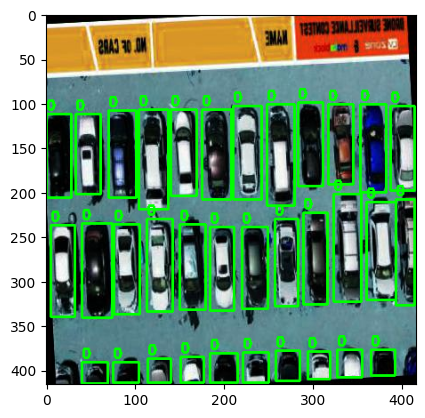

In [26]:

import cv2
from matplotlib import pyplot as plt
with open(Path(TRAIN_LABEL_DIR, 'cars0_png_jpg.rf.607e6a2480ae9778a618a251571baa34.txt'), "r") as f:
    labels = f.read()
    img = cv2.imread(str(Path(TRAIN_IMG_DIR, "cars0_png_jpg.rf.607e6a2480ae9778a618a251571baa34.jpg")))
    height, width, _ = img.shape

    for label in labels.strip().splitlines():
        class_id, center_x, center_y, w, h = map(float, label.split())

        # Convert normalized coordinates to pixel coordinates
        center_x_pixel = int(center_x * width)
        center_y_pixel = int(center_y * height)
        w_pixel = int(w * width)
        h_pixel = int(h * height)
        
        # Calculate top-left corner of the bounding box
        x1 = int(center_x_pixel - w_pixel / 2)
        y1 = int(center_y_pixel - h_pixel / 2)
        
        # Calculate bottom-right corner of the bounding box
        x2 = int(center_x_pixel + w_pixel / 2)
        y2 = int(center_y_pixel + h_pixel / 2)
        
        cv2.crop

        # Draw rectangle on the image
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
        
        # Optionally, put the class ID text on the image
        cv2.putText(img, str(int(class_id)), (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    plt.imshow(img)

In [ ]:
!pip install ultralytics

In [29]:
import torch

model = torch.load(Path(CURR_DIR, 'models', 'yolo11n.pt'))

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/rjomega-linux/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


In [3]:
from ultralytics import YOLO
from pathlib import Path

# Load a COCO-pretrained YOLO11n model
model = YOLO(Path(CURR_DIR, 'models', 'yolo11s.pt'))

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data=Path(CAR_DATASET_DIR, "mydata128.yaml"), epochs=100, imgsz=600, patience=20)
results

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine/trainer: task=detect, mode=train, model=/home/rjomega-linux/projects/CarPark_ComputerVision/models/yolo11s.pt, data=/home/rjomega-linux/projects/CarPark_ComputerVision/cars_kaggle/mydata128.yaml, epochs=100, time=None, patience=20, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, 

train: Scanning /home/rjomega-linux/projects/CarPark_ComputerVision/cars_kaggle/mydata/labels/train.cache... 280 images, 0 backgrounds, 0 corrupt: 100%|████
val: Scanning /home/rjomega-linux/projects/CarPark_ComputerVision/cars_kaggle/mydata/labels/test.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|████████


Plotting labels to /home/rjomega-linux/projects/CarPark_ComputerVision/runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 608 train, 608 val
Using 8 dataloader workers
Logging results to /home/rjomega-linux/projects/CarPark_ComputerVision/runs/detect/train10
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.22G      1.036      1.711      1.109        151        608: 100%|██████████| 18/18 [00:06<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         19        459      0.892      0.983      0.978      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.61G     0.8779     0.6281      0.937        225        608: 100%|██████████| 18/18 [00:04<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         19        459      0.882       0.93      0.957      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.27G     0.8638     0.5615     0.9335        193        608: 100%|██████████| 18/18 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         19        459      0.695       0.94      0.774      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.42G     0.8768      0.519      0.934        236        608: 100%|██████████| 18/18 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         19        459      0.765        0.9      0.754      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.33G     0.9053     0.5103     0.9418        206        608: 100%|██████████| 18/18 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all         19        459       0.42      0.806      0.386       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.28G     0.8829     0.5042     0.9405        222        608: 100%|██████████| 18/18 [00:04<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         19        459      0.969      0.966       0.98      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.39G     0.8895     0.4979     0.9373        325        608: 100%|██████████| 18/18 [00:04<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         19        459       0.96      0.947      0.959      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       4.4G     0.8549      0.491     0.9324        218        608: 100%|██████████| 18/18 [00:04<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]

                   all         19        459      0.959      0.972      0.983      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       4.2G     0.8404     0.4642     0.9217        237        608: 100%|██████████| 18/18 [00:04<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         19        459      0.978      0.959      0.988      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.71G     0.8207     0.4595     0.9166        234        608: 100%|██████████| 18/18 [00:04<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         19        459      0.968      0.974      0.985      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.22G     0.8139     0.4511     0.9183        242        608: 100%|██████████| 18/18 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         19        459      0.972      0.974       0.99      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.73G     0.8101     0.4524     0.9112        161        608: 100%|██████████| 18/18 [00:04<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         19        459      0.974      0.976       0.99      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.68G      0.813     0.4387      0.916        302        608: 100%|██████████| 18/18 [00:04<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all         19        459      0.978      0.969      0.986      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.36G     0.7818     0.4186     0.9045        193        608: 100%|██████████| 18/18 [00:04<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all         19        459      0.989      0.981      0.989      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       4.8G     0.7832     0.4186     0.9041        209        608: 100%|██████████| 18/18 [00:04<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all         19        459      0.974      0.989      0.987      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.46G     0.7807     0.4146     0.9081        256        608: 100%|██████████| 18/18 [00:04<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         19        459      0.982      0.976       0.99       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.36G      0.774     0.4076     0.8982        242        608: 100%|██████████| 18/18 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]

                   all         19        459      0.982      0.976      0.989      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.29G     0.7872     0.4071     0.9094        199        608: 100%|██████████| 18/18 [00:04<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]


                   all         19        459      0.977       0.98      0.986      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.31G     0.7788     0.4066      0.901        172        608: 100%|██████████| 18/18 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         19        459      0.986      0.969      0.993      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.52G     0.7857     0.4072      0.898        311        608: 100%|██████████| 18/18 [00:04<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]

                   all         19        459      0.983       0.98      0.991      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       4.4G     0.7726     0.4097      0.901        294        608: 100%|██████████| 18/18 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all         19        459      0.974      0.991      0.993      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.26G     0.7738     0.4052     0.8936        200        608: 100%|██████████| 18/18 [00:04<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all         19        459      0.984      0.983      0.993      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.58G     0.7544     0.3913      0.894        158        608: 100%|██████████| 18/18 [00:04<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         19        459       0.98      0.978      0.992      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.51G     0.7574     0.3897     0.8936        196        608: 100%|██████████| 18/18 [00:04<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all         19        459       0.98      0.989      0.992      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.34G     0.7566     0.3996     0.8988        155        608: 100%|██████████| 18/18 [00:04<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]

                   all         19        459      0.985       0.98      0.992        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.68G     0.7598     0.3957     0.8937        154        608: 100%|██████████| 18/18 [00:04<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all         19        459      0.986      0.987       0.99      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.64G     0.7607     0.3956     0.8942        318        608: 100%|██████████| 18/18 [00:04<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]


                   all         19        459      0.985      0.979      0.991      0.797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.46G     0.7499     0.3906     0.8858        291        608: 100%|██████████| 18/18 [00:04<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         19        459      0.984      0.985      0.991      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.34G     0.7468      0.379      0.889        228        608: 100%|██████████| 18/18 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all         19        459      0.983       0.98      0.991      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.25G     0.7411     0.3812     0.8953        234        608: 100%|██████████| 18/18 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         19        459      0.989       0.98      0.992      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.88G     0.7429     0.3807     0.8872        146        608: 100%|██████████| 18/18 [00:04<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         19        459       0.98      0.983      0.991      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.38G     0.7372     0.3817     0.8855        158        608: 100%|██████████| 18/18 [00:04<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         19        459      0.982      0.991      0.994      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.58G     0.7372     0.3722     0.8852        377        608: 100%|██████████| 18/18 [00:04<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]

                   all         19        459      0.986      0.974      0.993      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.74G     0.7407     0.3713     0.8865        274        608: 100%|██████████| 18/18 [00:04<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]

                   all         19        459      0.986      0.983      0.993        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       4.2G     0.7603     0.3758     0.8839        261        608: 100%|██████████| 18/18 [00:03<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         19        459       0.99      0.978      0.991      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.18G     0.7208     0.3636     0.8785        179        608: 100%|██████████| 18/18 [00:04<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         19        459      0.989      0.976      0.991      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.52G     0.7297     0.3651     0.8891        202        608: 100%|██████████| 18/18 [00:03<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         19        459      0.982      0.977       0.99      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.29G      0.732     0.3693     0.8864        165        608: 100%|██████████| 18/18 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         19        459      0.987      0.974      0.992      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       4.1G     0.7343     0.3679     0.8904        349        608: 100%|██████████| 18/18 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


                   all         19        459      0.987      0.983      0.991      0.802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.66G     0.7318     0.3654     0.8854        215        608: 100%|██████████| 18/18 [00:04<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

                   all         19        459      0.983      0.985      0.993      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.54G     0.7296     0.3661     0.8822        449        608: 100%|██████████| 18/18 [00:04<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]

                   all         19        459      0.988      0.985      0.993       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.29G     0.7263     0.3599     0.8836        301        608: 100%|██████████| 18/18 [00:04<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]


                   all         19        459      0.987      0.982      0.993      0.814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.46G     0.7288      0.358     0.8875        247        608: 100%|██████████| 18/18 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         19        459      0.979      0.987      0.993      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.35G     0.7243     0.3531     0.8768        299        608: 100%|██████████| 18/18 [00:04<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         19        459      0.991      0.975      0.992      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.34G     0.7139     0.3513     0.8828        171        608: 100%|██████████| 18/18 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         19        459      0.982       0.98      0.991      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.58G     0.7038     0.3534     0.8794        225        608: 100%|██████████| 18/18 [00:04<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         19        459       0.98      0.976      0.986      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.55G     0.6993     0.3504     0.8771        281        608: 100%|██████████| 18/18 [00:04<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         19        459      0.981      0.976       0.99      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.53G      0.707     0.3524     0.8817        169        608: 100%|██████████| 18/18 [00:04<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all         19        459      0.985      0.979       0.99      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.55G     0.7089     0.3519     0.8786        211        608: 100%|██████████| 18/18 [00:04<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]

                   all         19        459      0.993      0.976      0.991      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.39G     0.6989      0.349     0.8835        247        608: 100%|██████████| 18/18 [00:04<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]

                   all         19        459      0.986       0.98      0.992      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       4.4G      0.715     0.3577     0.8754        293        608: 100%|██████████| 18/18 [00:04<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         19        459      0.984      0.985      0.991       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.59G      0.691     0.3487     0.8766        282        608: 100%|██████████| 18/18 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         19        459       0.99      0.967      0.991      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.17G     0.7059      0.345     0.8835        193        608: 100%|██████████| 18/18 [00:04<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         19        459      0.989      0.977      0.991      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.49G     0.7254     0.3589     0.8828        277        608: 100%|██████████| 18/18 [00:04<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]

                   all         19        459      0.991      0.978      0.991      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.38G     0.7015     0.3427     0.8784        196        608: 100%|██████████| 18/18 [00:04<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         19        459      0.985      0.978      0.991      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.42G     0.6895     0.3326     0.8756        304        608: 100%|██████████| 18/18 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         19        459      0.982      0.991      0.993      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.41G     0.6921     0.3344     0.8751        231        608: 100%|██████████| 18/18 [00:04<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         19        459      0.974      0.991      0.993      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.44G     0.6948     0.3395     0.8731        241        608: 100%|██████████| 18/18 [00:04<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         19        459      0.989      0.974      0.992      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.43G     0.6842     0.3354     0.8786        190        608: 100%|██████████| 18/18 [00:04<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]

                   all         19        459      0.987      0.975      0.993      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.72G     0.6837     0.3346     0.8706        307        608: 100%|██████████| 18/18 [00:04<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         19        459      0.976      0.987      0.993       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.51G     0.6866     0.3365     0.8745        175        608: 100%|██████████| 18/18 [00:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]

                   all         19        459      0.984      0.987      0.992      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.39G     0.6915     0.3325     0.8762        252        608: 100%|██████████| 18/18 [00:04<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         19        459      0.991      0.976      0.993      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.58G     0.6902     0.3316     0.8701        320        608: 100%|██████████| 18/18 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


                   all         19        459      0.978      0.991      0.991      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.76G     0.6762     0.3244     0.8664        229        608: 100%|██████████| 18/18 [00:04<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         19        459      0.987      0.987      0.992      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.61G     0.6819     0.3243     0.8727        169        608: 100%|██████████| 18/18 [00:04<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]


                   all         19        459      0.986      0.987      0.991      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.24G      0.675     0.3286     0.8689        224        608: 100%|██████████| 18/18 [00:04<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         19        459      0.983      0.984      0.992      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.67G     0.6853     0.3295     0.8706        209        608: 100%|██████████| 18/18 [00:04<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         19        459      0.991       0.98      0.992      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.39G     0.6681      0.325     0.8676        215        608: 100%|██████████| 18/18 [00:04<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]

                   all         19        459      0.989       0.98      0.992      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.37G     0.6773     0.3257     0.8686        242        608: 100%|██████████| 18/18 [00:04<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]

                   all         19        459      0.992      0.969      0.992      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.62G     0.6701     0.3208     0.8684        241        608: 100%|██████████| 18/18 [00:04<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         19        459      0.983      0.981      0.991       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.63G     0.6732      0.323     0.8719        230        608: 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

                   all         19        459      0.988      0.983      0.993      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.52G     0.6632     0.3193     0.8704        156        608: 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         19        459      0.987       0.98      0.989      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.63G     0.6569     0.3168     0.8647        325        608: 100%|██████████| 18/18 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         19        459      0.991       0.98      0.989       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.34G     0.6668     0.3161     0.8632        258        608: 100%|██████████| 18/18 [00:04<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

                   all         19        459      0.988       0.98       0.99      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.27G     0.6471     0.3137     0.8619        214        608: 100%|██████████| 18/18 [00:04<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all         19        459      0.988      0.976      0.989      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.37G      0.658     0.3134     0.8683        101        608: 100%|██████████| 18/18 [00:04<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

                   all         19        459      0.985      0.976      0.989      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.25G     0.6586     0.3066     0.8674        257        608: 100%|██████████| 18/18 [00:04<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         19        459      0.986      0.978      0.988      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.52G      0.661     0.3106     0.8678        147        608: 100%|██████████| 18/18 [00:04<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         19        459      0.988      0.976      0.989      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.28G     0.6481     0.3073     0.8653        251        608: 100%|██████████| 18/18 [00:04<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         19        459      0.983      0.969       0.99      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.27G     0.6523     0.3056     0.8654        249        608: 100%|██████████| 18/18 [00:04<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]

                   all         19        459      0.985      0.982      0.991      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.71G     0.6458     0.3048      0.866        150        608: 100%|██████████| 18/18 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all         19        459      0.981      0.988      0.991      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.75G     0.6475     0.3071     0.8638        210        608: 100%|██████████| 18/18 [00:04<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         19        459      0.978       0.99      0.993      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.15G     0.6377     0.2991     0.8604        183        608: 100%|██████████| 18/18 [00:04<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         19        459      0.978      0.991      0.992       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.45G     0.6445     0.3041     0.8608        225        608: 100%|██████████| 18/18 [00:04<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]

                   all         19        459      0.991      0.984      0.992      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.34G     0.6332     0.2968     0.8633        172        608: 100%|██████████| 18/18 [00:04<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         19        459      0.989      0.985      0.991      0.823
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 65, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

85 epochs completed in 0.119 hours.
Optimizer stripped from /home/rjomega-linux/projects/CarPark_ComputerVision/runs/detect/train10/weights/last.pt, 19.2MB
Optimizer stripped from /home/rjomega-linux/projects/CarPark_ComputerVision/runs/detect/train10/weights/best.pt, 19.2MB

Validating /home/rjomega-linux/projects/CarPark_ComputerVision/runs/detect/train10/weights/best.pt...
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


                   all         19        459      0.986      0.987      0.991      0.825
Speed: 0.2ms preprocess, 3.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /home/rjomega-linux/projects/CarPark_ComputerVision/runs/detect/train10


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fcea684cb50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [4]:
results = model("/home/rjomega-linux/projects/CarPark_ComputerVision/data/sample_parking_lot_img.jpg",conf=0.7)


image 1/1 /home/rjomega-linux/projects/CarPark_ComputerVision/data/sample_parking_lot_img.jpg: 448x608 19 cars, 68.1ms
Speed: 2.5ms preprocess, 68.1ms inference, 8.3ms postprocess per image at shape (1, 3, 448, 608)


In [5]:
import matplotlib.pyplot as plt

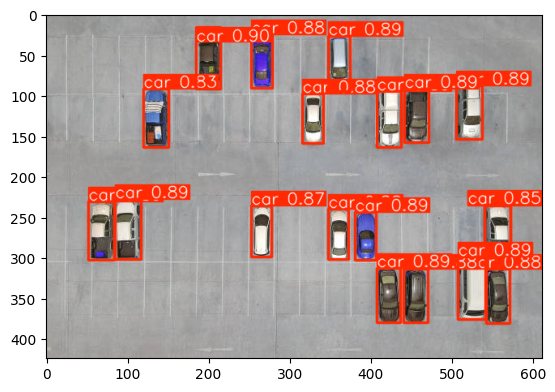

In [6]:

%matplotlib inline
plt.imshow(results[0].plot())
plt.show()

In [1]:
from ultralytics import YOLO
model = YOLO("/home/rjomega-linux/projects/CarPark_ComputerVision/runs/detect/train10/weights/best.pt")

In [2]:
from PIL import Image

img = Image.open("/home/rjomega-linux/projects/CarPark_ComputerVision/data/sample_parking_lot_img.jpg")

In [14]:
import numpy as np
result = model(np.array(img))


0: 448x608 19 cars, 67.6ms
Speed: 4.0ms preprocess, 67.6ms inference, 5.8ms postprocess per image at shape (1, 3, 448, 608)


In [20]:
result

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'car'}
 obb: None
 orig_img: array([[[156, 158, 157],
         [152, 154, 153],
         [148, 150, 149],
         ...,
         [153, 155, 154],
         [152, 154, 153],
         [150, 152, 151]],
 
        [[158, 160, 159],
         [155, 157, 156],
         [150, 152, 151],
         ...,
         [153, 155, 154],
         [152, 154, 153],
         [150, 152, 151]],
 
        [[157, 159, 158],
         [154, 156, 155],
         [150, 152, 151],
         ...,
         [153, 155, 154],
         [151, 153, 152],
         [150, 152, 151]],
 
        ...,
 
        [[156, 160, 161],
         [154, 158, 159],
         [153, 157, 158],
         ...,
         [159, 159, 159],
         [160, 160, 160],
         [161, 161, 161]],
 
        [[157, 161, 162],
         [156, 160, 161],
         [155, 159, 160],
         ...,
         [158, 158, 1

In [22]:
result[0].boxes.data.tolist()

[[185.93629455566406,
  16.527759552001953,
  215.58189392089844,
  93.12947082519531,
  0.8923331499099731,
  0.0],
 [381.915283203125,
  244.17694091796875,
  408.08892822265625,
  302.50439453125,
  0.8871600031852722,
  0.0],
 [509.1246337890625,
  299.9832763671875,
  543.3900756835938,
  377.42547607421875,
  0.8852841258049011,
  0.0],
 [317.1946716308594,
  97.92918395996094,
  342.94537353515625,
  159.9127960205078,
  0.881793200969696,
  0.0],
 [348.756103515625,
  240.0142059326172,
  374.3289489746094,
  303.031005859375,
  0.8799682259559631,
  0.0],
 [349.23162841796875,
  27.95841407775879,
  374.98712158203125,
  94.9142074584961,
  0.8799104690551758,
  0.0],
 [84.81705474853516,
  228.4790802001953,
  117.57008361816406,
  303.5965270996094,
  0.8775543570518494,
  0.0],
 [544.0687255859375,
  314.2371520996094,
  572.8015747070312,
  382.4708251953125,
  0.8745982050895691,
  0.0],
 [253.70860290527344,
  24.277936935424805,
  279.6946716308594,
  91.11769104003906,

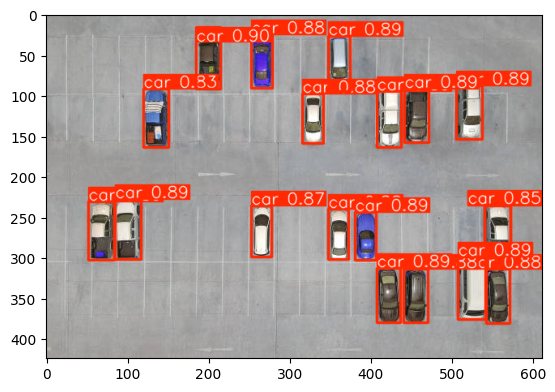

In [6]:
from matplotlib import pyplot as plt
plt.imshow(result[0].plot())

In [14]:
plt.imshow(model("/home/rjomega-linux/projects/CarPark_ComputerVision/data/sample_parking_lot_img.jpg").plot())


image 1/1 /home/rjomega-linux/projects/CarPark_ComputerVision/data/sample_parking_lot_img.jpg: 448x608 19 cars, 131.2ms
Speed: 3.4ms preprocess, 131.2ms inference, 3.7ms postprocess per image at shape (1, 3, 448, 608)


AttributeError: 'list' object has no attribute 'plot'

In [11]:
model.predict("/home/rjomega-linux/projects/CarPark_ComputerVision/data/sample_parking_lot_img.jpg")

AttributeError: 'dict' object has no attribute 'predict'